In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv("new_model.csv")
df

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [3]:
df.shape

(400, 14)

In [4]:
df.columns

Index(['Bp', 'Sg', 'Al', 'Su', 'Rbc', 'Bu', 'Sc', 'Sod', 'Pot', 'Hemo', 'Wbcc',
       'Rbcc', 'Htn', 'Class'],
      dtype='object')

In [5]:
df.value_counts('Class')

Class
1    250
0    150
dtype: int64

In [6]:
df.isnull().sum()

Bp       0
Sg       0
Al       0
Su       0
Rbc      0
Bu       0
Sc       0
Sod      0
Pot      0
Hemo     0
Wbcc     0
Rbcc     0
Htn      0
Class    0
dtype: int64

In [7]:
df.drop_duplicates()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.020,1.0,0.0,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1
1,50.0,1.020,4.0,0.0,1.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1
2,80.0,1.010,2.0,3.0,1.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1
3,70.0,1.005,4.0,0.0,1.0,56.0,3.8,111.00,2.50,11.2,6700.0,3.90,1.0,1
4,80.0,1.010,2.0,0.0,1.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.020,0.0,0.0,1.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0
396,70.0,1.025,0.0,0.0,1.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.20,0.0,0
397,80.0,1.020,0.0,0.0,1.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0
398,60.0,1.025,0.0,0.0,1.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bp      400 non-null    float64
 1   Sg      400 non-null    float64
 2   Al      400 non-null    float64
 3   Su      400 non-null    float64
 4   Rbc     400 non-null    float64
 5   Bu      400 non-null    float64
 6   Sc      400 non-null    float64
 7   Sod     400 non-null    float64
 8   Pot     400 non-null    float64
 9   Hemo    400 non-null    float64
 10  Wbcc    400 non-null    float64
 11  Rbcc    400 non-null    float64
 12  Htn     400 non-null    float64
 13  Class   400 non-null    int64  
dtypes: float64(13), int64(1)
memory usage: 43.9 KB


In [9]:
df.describe()

,Bp,Sg,Al,Su,Rbc,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,76.455000,1.017712,1.015000,0.395000,0.882500,57.40550,3.07235,137.529025,4.627850,12.526900,8406.090000,4.708275,0.369350,0.625000
std,13.476536,0.005434,1.272329,1.040038,0.322418,49.28597,5.61749,9.204273,2.819783,2.716171,2523.219976,0.840315,0.482023,0.484729
min,50.000000,1.005000,0.000000,0.000000,0.000000,1.50000,0.40000,4.500000,2.500000,3.100000,2200.000000,2.100000,0.000000,0.000000
25%,70.000000,1.015000,0.000000,0.000000,1.000000,27.00000,0.90000,135.000000,4.000000,10.875000,6975.000000,4.500000,0.000000,0.000000
50%,78.000000,1.020000,1.000000,0.000000,1.000000,44.00000,1.40000,137.530000,4.630000,12.530000,8406.000000,4.710000,0.000000,1.000000
75%,80.000000,1.020000,2.000000,0.000000,1.000000,61.75000,3.07000,141.000000,4.800000,14.625000,9400.000000,5.100000,1.000000,1.000000
max,180.000000,1.025000,5.000000,5.000000,1.000000,391.00000,76.00000,163.000000,47.000000,17.800000,26400.000000,8.000000,1.000000,1.000000


**EDA**

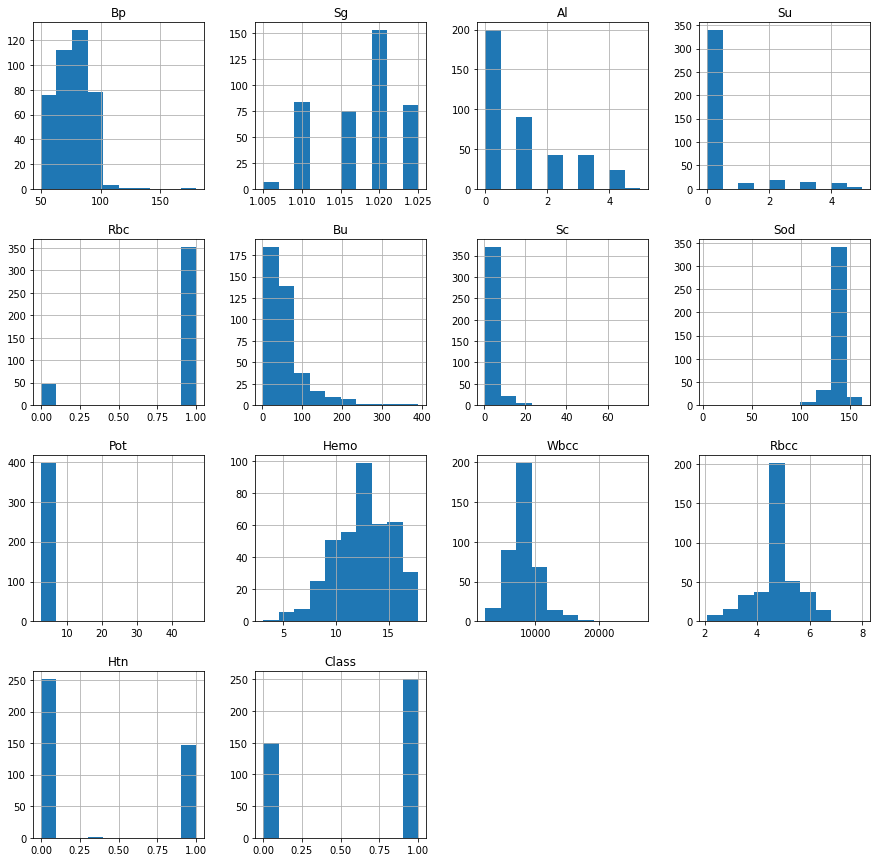

In [10]:
plot = df.hist(figsize=(15,15))

**Handling Outliers**

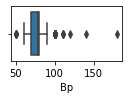

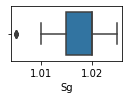

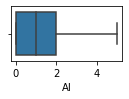

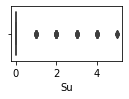

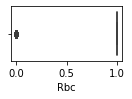

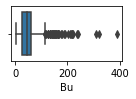

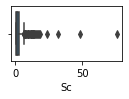

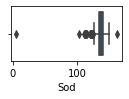

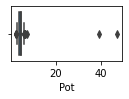

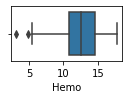

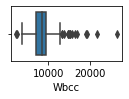

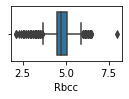

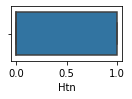

In [11]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=(column),data=df)

In [12]:
for column in df.columns:
    q1=df[column].quantile(0.25)
    q3=df[column].quantile(0.75)
    iqr=q3-q1
    lower_limit=q1-(1.5*iqr)
    upper_limit=q3+(1.5*iqr)
    df[column]=np.where(df[column]<lower_limit,lower_limit,df[column])
    df[column]=np.where(df[column]>upper_limit,upper_limit,df[column])

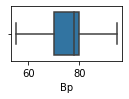

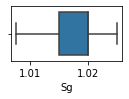

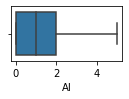

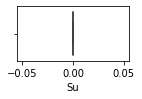

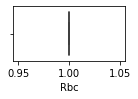

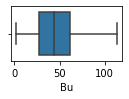

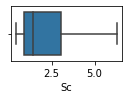

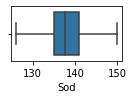

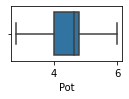

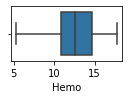

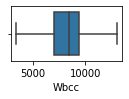

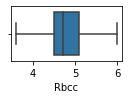

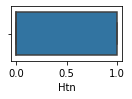

In [13]:
for column in df.columns[0:-1]:
    plt.figure(figsize=(2,1))
    sns.boxplot(x=(column),data=df)

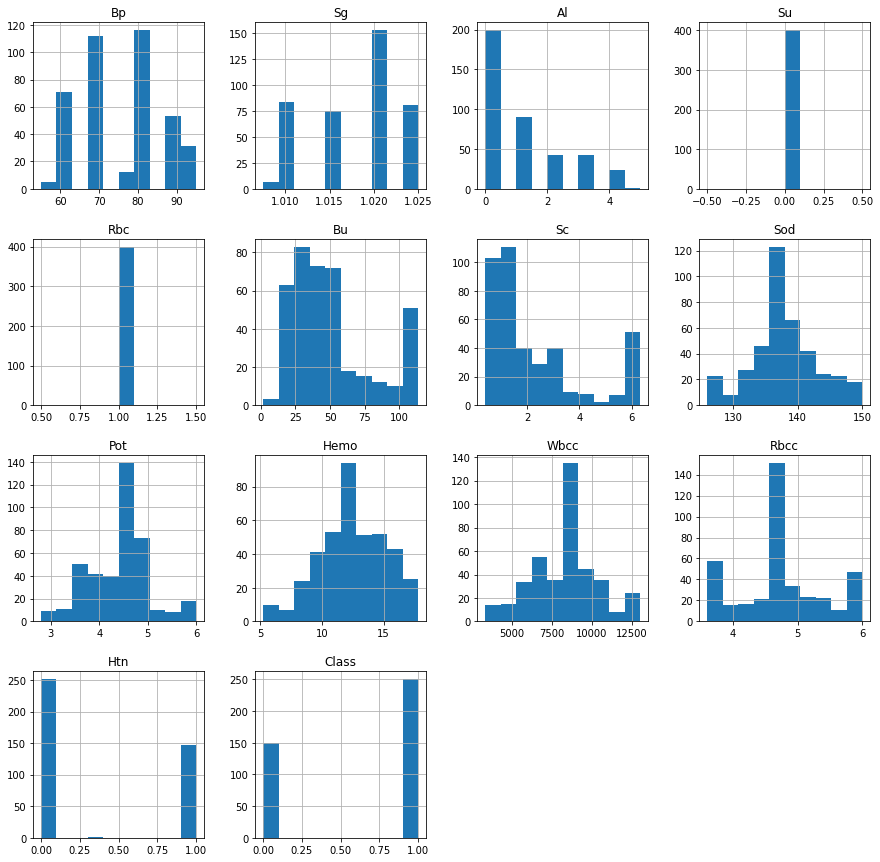

In [14]:
plot = df.hist(figsize=(15,15))

**Feature Selection**

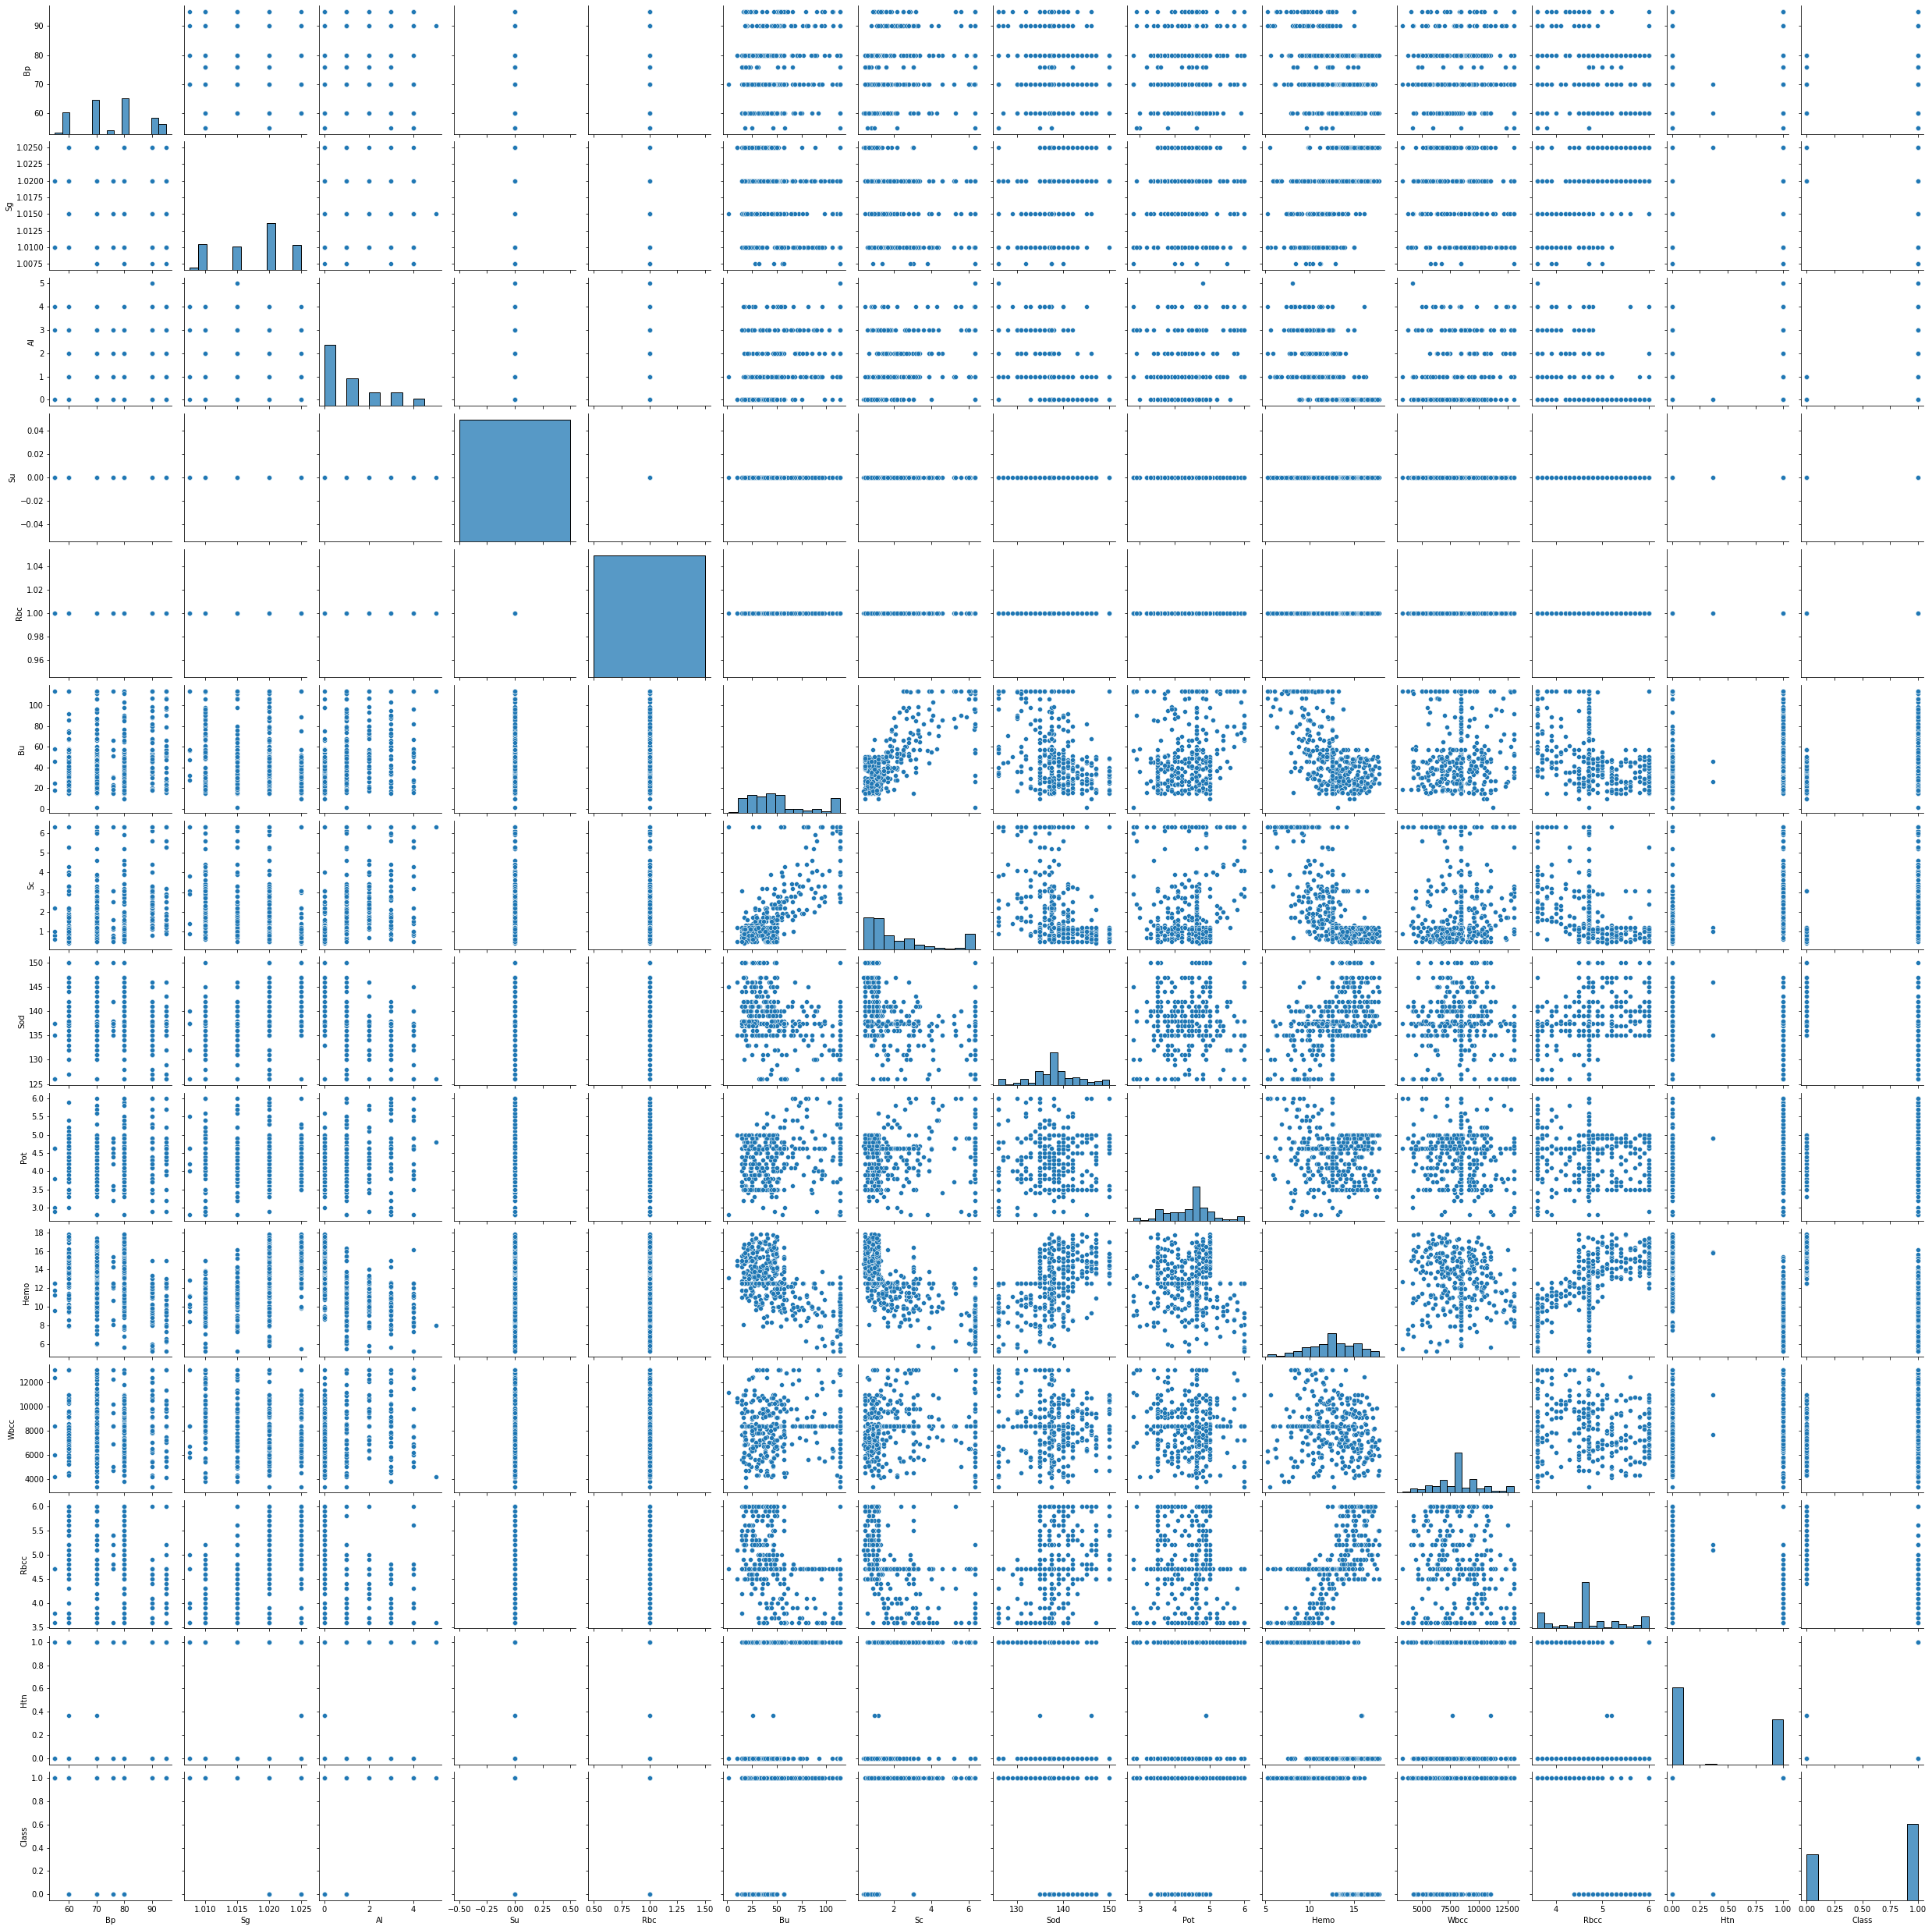

In [15]:
sns.pairplot(data=df)

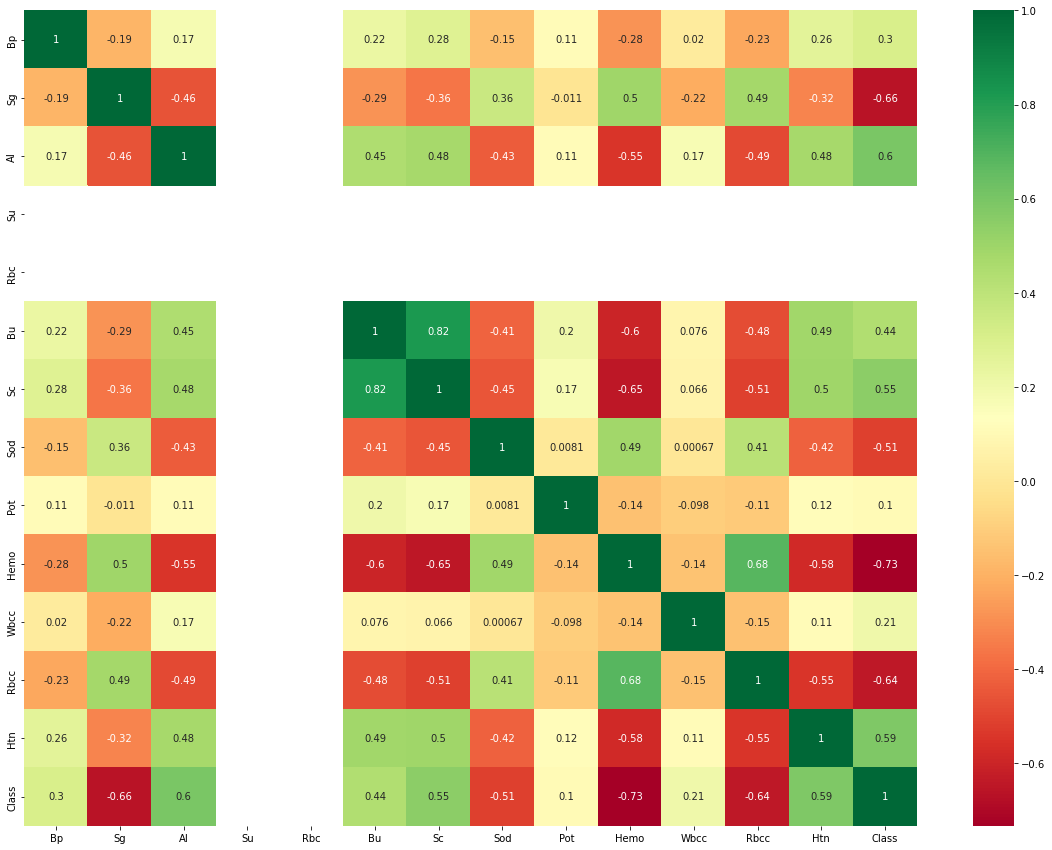

In [16]:
corr = df.corr()
features = corr.index
plt.figure(figsize=(20,15))
ax = sns.heatmap(df[features].corr(),annot=True,cmap='RdYlGn')

In [17]:
df = df.drop(['Su', 'Rbc'],axis=1)
df

,Bp,Sg,Al,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn,Class
0,80.0,1.0200,1.0,36.0,1.2,137.53,4.63,15.4,7800.0,5.20,1.0,1.0
1,55.0,1.0200,4.0,18.0,0.8,137.53,4.63,11.3,6000.0,4.71,0.0,1.0
2,80.0,1.0100,2.0,53.0,1.8,137.53,4.63,9.6,7500.0,4.71,0.0,1.0
3,70.0,1.0075,4.0,56.0,3.8,126.00,2.80,11.2,6700.0,3.90,1.0,1.0
4,80.0,1.0100,2.0,26.0,1.4,137.53,4.63,11.6,7300.0,4.60,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,80.0,1.0200,0.0,49.0,0.5,150.00,4.90,15.7,6700.0,4.90,0.0,0.0
396,70.0,1.0250,0.0,31.0,1.2,141.00,3.50,16.5,7800.0,6.00,0.0,0.0
397,80.0,1.0200,0.0,26.0,0.6,137.00,4.40,15.8,6600.0,5.40,0.0,0.0
398,60.0,1.0250,0.0,50.0,1.0,135.00,4.90,14.2,7200.0,5.90,0.0,0.0


In [18]:
y = df['Class']
X = df.drop(['Class'], axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns)
X

,Bp,Sg,Al,Bu,Sc,Sod,Pot,Hemo,Wbcc,Rbcc,Htn
0,0.392843,0.420662,-0.011804,-0.496046,-0.567125,-0.110959,0.305850,1.064449,-0.235153,0.682096,1.309979
1,-1.893788,0.420662,2.349029,-1.091691,-0.782486,-0.110959,0.305850,-0.457996,-1.123109,-0.044919,-0.767210
2,0.392843,-1.454156,0.775140,0.066507,-0.244084,-0.110959,0.305850,-1.089254,-0.383145,-0.044919,-0.767210
3,-0.521809,-1.922860,2.349029,0.165782,0.832719,-2.296874,-2.540350,-0.495129,-0.777793,-1.246720,1.309979
4,0.392843,-1.454156,0.775140,-0.826960,-0.459445,-0.110959,0.305850,-0.346598,-0.481807,-0.208127,-0.767210
...,...,...,...,...,...,...,...,...,...,...,...
395,0.392843,0.420662,-0.798748,-0.065858,-0.944007,2.253165,0.725781,1.175848,-0.777793,0.236985,-0.767210
396,-0.521809,1.358071,-0.798748,-0.661503,-0.567125,0.546900,-1.451640,1.472911,-0.235153,1.869060,-0.767210
397,0.392843,0.420662,-0.798748,-0.826960,-0.890166,-0.211439,-0.051869,1.212981,-0.827124,0.978837,-0.767210
398,-1.436462,1.358071,-0.798748,-0.032767,-0.674806,-0.590609,0.725781,0.618856,-0.531138,1.720689,-0.767210


In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [21]:
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (320, 11)
y_train shape:  (320,)
X_test shape:  (80, 11)
y_test shape:  (80,)


In [22]:
y_train.value_counts()

1.0    198
0.0    122
Name: Class, dtype: int64

In [23]:
from imblearn.over_sampling import SMOTE
sm=SMOTE(sampling_strategy='minority', random_state=10)
oversampled_X, oversampled_Y = sm.fit_resample(X_train, y_train)
df = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

In [24]:
df['Class'].value_counts()

1.0    198
0.0    198
Name: Class, dtype: int64

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
print('Training accuracy : ',model.score(X_train,y_train))
print('Test accuracy : ',model.score(X_test,y_test))

Training accuracy :  0.98125
Test accuracy :  0.9875


In [26]:
y_pred=model.predict(X_test)
y_pred


array([1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.])

In [27]:
from sklearn.metrics import plot_confusion_matrix, classification_report

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


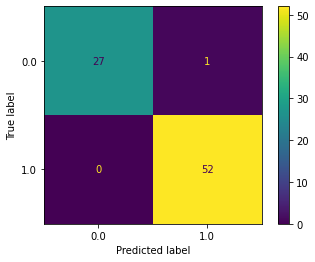

In [28]:
print(plot_confusion_matrix(model,X_test,y_test))

In [29]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       1.00      0.96      0.98        28
         1.0       0.98      1.00      0.99        52

    accuracy                           0.99        80
   macro avg       0.99      0.98      0.99        80
weighted avg       0.99      0.99      0.99        80



In [30]:
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
rfc=RandomForestClassifier(n_estimators=700)

#Train the model using the training sets y_pred=clf.predict(X_test)
rfc.fit(X_train,y_train)

rfc_pred=rfc.predict(X_test)

In [31]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, rfc_pred))

Accuracy: 1.0


In [32]:
estimator = rfc.estimators_[5]
export_graphviz(estimator, out_file='tree.dot', 
                class_names = ['0','1'], proportion = False, 
                precision = 2, filled = True)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
Image(filename = 'tree.png')

Output hidden; open in https://colab.research.google.com to view.

Text(91.68, 0.5, 'Predicted')

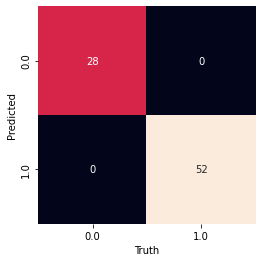

In [33]:
mat = confusion_matrix(rfc_pred, y_test)
names = np.unique(rfc_pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        28
         1.0       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



**SVM**

In [35]:
from sklearn import svm
from sklearn.metrics import accuracy_score

In [36]:
svmPred=svm.SVC(kernel='linear')
svmPred.fit(X_train,y_train)

SVC(kernel='linear')

In [37]:
SVMPred=svmPred.predict(X_test)
SVMPred

array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1.,
       0., 0., 1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.])

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, SVMPred))

Accuracy: 0.975


In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,SVMPred))

              precision    recall  f1-score   support

         0.0       1.00      0.93      0.96        28
         1.0       0.96      1.00      0.98        52

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80

